****Coronary Artery Disease : Data Analysis****

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

%matplotlib inline

In [2]:
heart = pd.read_csv('heart.csv')


In [3]:
heart.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


**Dataset Dimensionality**

In [4]:
heart.shape


(303, 14)

**Assigning feature names to the dataset**

In [5]:
features = ['age','gender','chest_pain','rest_bp','cholestrol','fst_bs','rest_ecg','max_hrt_rate','ex_angina','oldpeak','slope','color_vsl','thal','num']

In [6]:
heart.columns = features


***Data Preprocesing steps***

**Step-1: Class handling in 'num'**


Handling the multivariate predicted attribute i.e. 'num', in which records with values >1 are effected with CAD and <1 are non-CAD.

In [7]:
pd.DataFrame(heart['num'].value_counts())


,num
1,165
0,138


**Finding the count of records with blockage > 50%**


In [8]:
heart[heart['num'] > 0]['num'].count()


165

***Categorizing the 'num' feature into two classes 0(Non-CAD i.e. blockage < 50%) and 1(CAD i.e. blockage >50%)***


In [9]:
heart['result'] = heart['num'].apply(lambda val : val if val == 0 else 1)
heart.head()

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1


In [10]:
heart['result'].value_counts()


1    165
0    138
Name: result, dtype: int64

***Visualize the CAD and Non-CAD records***


In [11]:
bar_font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 14,
        }

Text(0.5, 1.0, 'CAD and Non-CAD patient count')

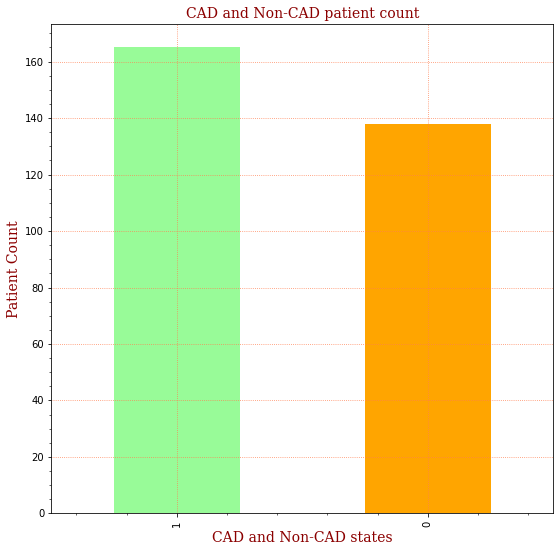

In [12]:
heart['result'].value_counts().plot(kind='bar', figsize=(9,9), color= ['palegreen','orange'])
plt.minorticks_on()
plt.grid(which='major',color='coral',linestyle=':')
plt.xlabel('CAD and Non-CAD states',fontdict=bar_font)
plt.ylabel('Patient Count',fontdict=bar_font)
plt.title('CAD and Non-CAD patient count',fontdict=bar_font)

***Finding the missing values***


As missing values are marked as '?'. So replacing such values with None.



In [13]:
heart = heart.applymap(lambda val : None if val == '?' else val)

***Counting the missing values***


In [14]:
heart.isnull().sum()


age             0
gender          0
chest_pain      0
rest_bp         0
cholestrol      0
fst_bs          0
rest_ecg        0
max_hrt_rate    0
ex_angina       0
oldpeak         0
slope           0
color_vsl       0
thal            0
num             0
result          0
dtype: int64

***Visualize the missing records***


In [15]:
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'bold',
        'size': 16,
        }

Text(0.5, 1.0, 'Missing values in the dataset')

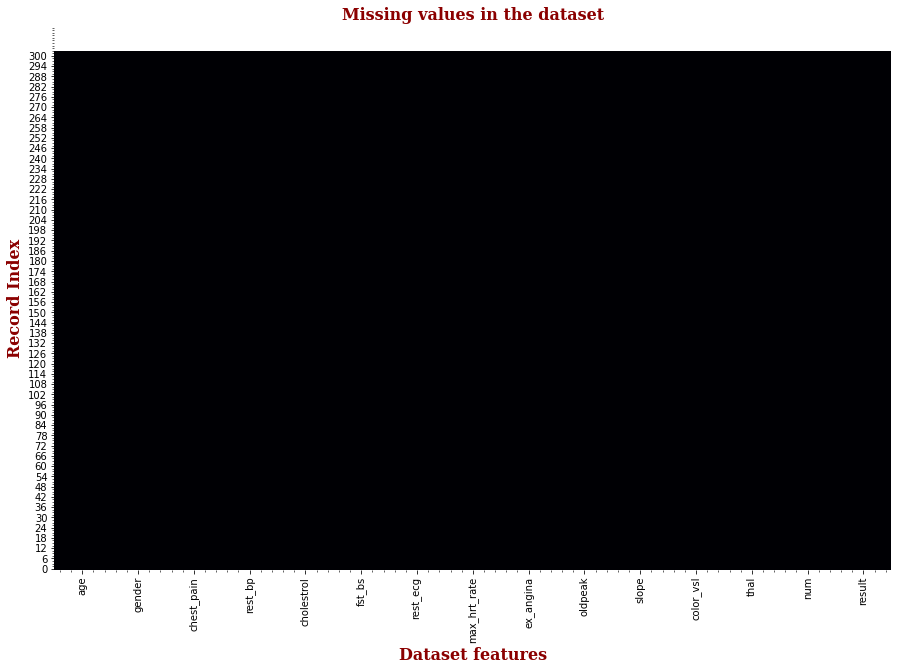

In [16]:
plt.figure(figsize = (15,10))
sns.heatmap(heart.isnull(),cbar=False,cmap='inferno')
plt.axis(ymin=0,ymax=318)
plt.minorticks_on()
plt.xlabel("Dataset features",fontdict=font)
plt.ylabel("Record Index",fontdict=font)
plt.title("Missing values in the dataset",fontdict=font)

***Count the records for color_vsl categories***


In [17]:
heart['color_vsl'].value_counts()


0    175
1     65
2     38
3     20
4      5
Name: color_vsl, dtype: int64

***Count the CAD and Non-CAD records for every color_vsl category***


In [18]:
pd.DataFrame(heart.groupby(['color_vsl','result'])['result'].count())

result
color_vsl result        
0         0           45
          1          130
1         0           44
          1           21
2         0           31
          1            7
3         0           17
          1            3
4         0            1
          1            4

**Filling the missing values in COLOR_VSL feature**


Replacing NULL with MAX occurence of respective feature class based on TARGET column¶



In [19]:
heart['fix_color_vsl'] = heart['color_vsl'].fillna(value='0.0')

In [20]:
heart['fix_color_vsl'].value_counts()


0    175
1     65
2     38
3     20
4      5
Name: fix_color_vsl, dtype: int64

In [21]:
heart[heart['thal'].isnull()]


,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl


In [22]:
heart['thal'].value_counts()


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

***Count the CAD and Non-CAD records for every thal category***


In [23]:
thal_missing_val = pd.DataFrame(heart.groupby(['thal','result'])['result'].count())

In [24]:
thal_missing_val.sort_values(['thal'],ascending=True)


result
thal result        
0    0            1
     1            1
1    0           12
     1            6
2    0           36
     1          130
3    0           89
     1           28

**Filling the missing values in THAL feature**

Replacing NULL with MAX occurence of respective feature class based on TARGET column¶



In [25]:
heart[(heart['result'] == 0) & (heart['thal'].isna())]

,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl


In [26]:
heart['result'].dtype


dtype('int64')

In [27]:
heart['fix_thal'] = heart[['thal','result']].apply(lambda val : '7.0' if val['result'] == 1 and val['thal'] == None 
                                                                 else '3.0' if val['result'] == 0 and val['thal'] == None else val['thal'],axis=1)

In [28]:
heart['thal'].value_counts()


2    166
3    117
1     18
0      2
Name: thal, dtype: int64

In [29]:
heart.columns


Index(['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope',
       'color_vsl', 'thal', 'num', 'result', 'fix_color_vsl', 'fix_thal'],
      dtype='object')

In [30]:
missing_val_font = {'family':'serif',
                   'weight': 'bold',
                   'size': 14,
                   'color':'red'}


Text(0.5, 1.0, 'Post fix - Missing values')

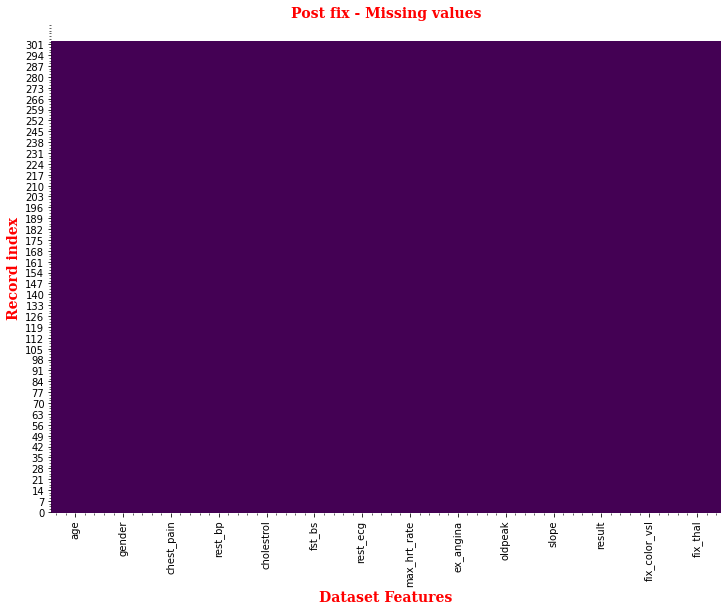

In [31]:
plt.figure(figsize=(12,9))
sns.heatmap(heart[['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
       'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak', 'slope', 'result', 'fix_color_vsl', 'fix_thal']].isnull(),cbar=False,cmap='viridis')
plt.minorticks_on()
plt.axis(ymin=0,ymax=315)
plt.xlabel("Dataset Features",fontdict=missing_val_font)
plt.ylabel("Record index",fontdict=missing_val_font)
plt.title("Post fix - Missing values",fontdict=missing_val_font)

**Datatype handling**


In [32]:
heart.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 17 columns):
age              303 non-null int64
gender           303 non-null int64
chest_pain       303 non-null int64
rest_bp          303 non-null int64
cholestrol       303 non-null int64
fst_bs           303 non-null int64
rest_ecg         303 non-null int64
max_hrt_rate     303 non-null int64
ex_angina        303 non-null int64
oldpeak          303 non-null float64
slope            303 non-null int64
color_vsl        303 non-null int64
thal             303 non-null int64
num              303 non-null int64
result           303 non-null int64
fix_color_vsl    303 non-null int64
fix_thal         303 non-null int64
dtypes: float64(1), int64(16)
memory usage: 40.3 KB


***Created a UDF for converting the datatypes of required columns***


In [33]:
def handle_datatype(df_name,unchange_col=None):
    """
    Description: This function will change the datatype of the features in the dataset.
    
    Input parameter:
    *df_name*: It will only accept the DataFrame object.
    *unchange_col*: This is the column for which you don't want to change the datatype.
    
    Return:
    It will returned the modified DataFrame object.
    """
    cols = ['age', 'gender', 'chest_pain', 'rest_bp', 'cholestrol', 'fst_bs',
            'rest_ecg', 'max_hrt_rate', 'ex_angina', 'oldpeak','slope', 'result', 'fix_color_vsl', 'fix_thal']
    for col in cols:
        if col != unchange_col:
            df_name[col] = df_name[col].astype('float')
            df_name[col] = df_name[col].astype('int')
    return df_name

In [34]:
handle_datatype(heart,'oldpeak')


,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,color_vsl,thal,num,result,fix_color_vsl,fix_thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1,1,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1,1,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1,1,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1,1,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1,1,0,2
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1,1,0,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1,1,0,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1,1,0,3
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1,1,0,3
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1,1,0,2


In [35]:
heart.drop(['color_vsl','thal','num'],axis=1,inplace=True)


**Exploratory Data Analysis**


***Question-1: How many people of age group 29-48 have blockage greater than 50%?***


In [36]:
age_grp_29_48 = pd.concat([heart[(heart['age'] >= 29.0) & (heart['age'] < 48.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

In [37]:
age_grp_29_48.reset_index(inplace=True)


In [38]:
age_grp_29_48.columns = ['result','age','color']


In [39]:
age_grp_29_48


,result,age,color
0,0,21,palegreen
1,1,55,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 29 - 48')

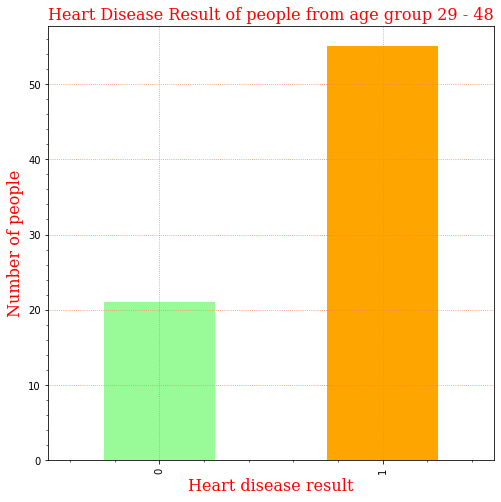

In [40]:
label_style={'family':'serif','color':'red','size':16}
age_grp_29_48.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_29_48['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 29 - 48',fontdict=label_style)

***Question-2: How many people of age group 48-56 have blockage greater than 50%?***


In [41]:
age_grp_48_56 = pd.concat([heart[(heart['age'] >= 48.0) & (heart['age'] < 56.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

age_grp_48_56.reset_index(inplace=True)

age_grp_48_56.columns = ['result','age','color']

age_grp_48_56

,result,age,color
0,0,28,palegreen
1,1,48,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 48 - 56')

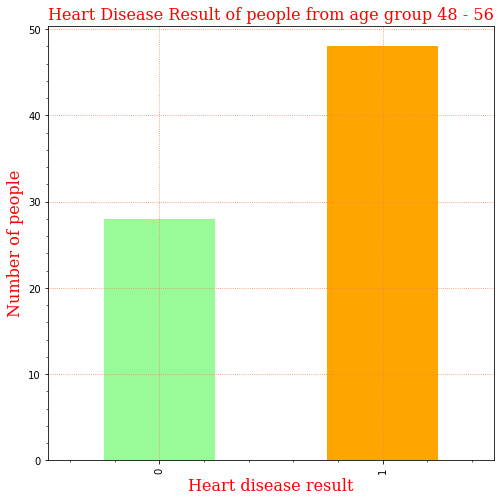

In [42]:
label_style={'family':'serif','color':'red','size':16}
age_grp_48_56.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_48_56['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 48 - 56',fontdict=label_style)

***Question-3: How many people of age group 56-77 have blockage greater than 50%?***


In [43]:
age_grp_56_77 = pd.concat([heart[(heart['age'] >= 56.0)][['age','result']].groupby(by='result',axis=0).count(),
           pd.DataFrame({'color':['palegreen','orange']})],axis=1)

age_grp_56_77.reset_index(inplace=True)

age_grp_56_77.columns = ['result','age','color']

age_grp_56_77

,result,age,color
0,0,89,palegreen
1,1,62,orange


Text(0.5, 1.0, 'Heart Disease Result of people from age group 56 - 77')

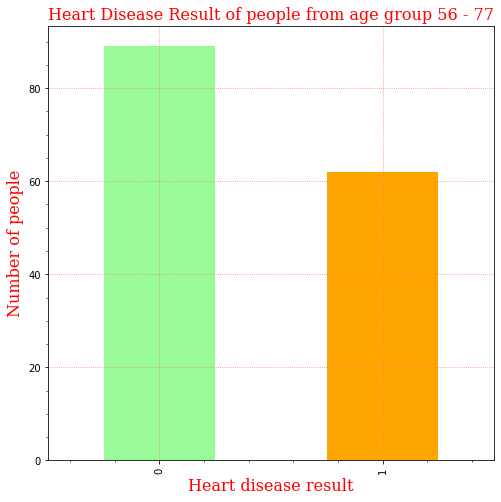

In [44]:
label_style={'family':'serif','color':'red','size':16}
age_grp_56_77.plot(kind='bar',x='result',y='age',figsize=(8,8),color=age_grp_56_77['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Heart disease result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('Heart Disease Result of people from age group 56 - 77',fontdict=label_style)

***Question-4: How many MALE and FEMALE have heart disease?***


In [45]:
pd.concat([pd.DataFrame(heart['gender'].value_counts()),pd.DataFrame({'gender_name':['female','male']})],axis=1)

,gender,gender_name
0,96,female
1,207,male


In [46]:
gender_dist = pd.DataFrame(heart.groupby(by=['gender','result'],axis=0)['age'].count())

gender_dist.columns = ['Count of people']
gender_dist.index.names = ['Gender(0:Female,1:Male)','Heart Disease Result']

In [47]:
gender_dist


Count of people
Gender(0:Female,1:Male) Heart Disease Result                 
0                       0                                  24
                        1                                  72
1                       0                                 114
                        1                                  93

***Question-5: How many patients suffered from various CHEST PAINS?***


In [48]:
chest_pain_dist = pd.DataFrame(heart.groupby(by=['gender','result','chest_pain'],axis=0)['age'].count())

In [49]:
chest_pain_dist.columns = ['Patient Count']
chest_pain_dist.index.names = ['Gender(0:Female,1:Male)','Heart Disease Result','Chest Pain Type']

In [50]:
chest_pain_dist


Patient Count
Gender(0:Female,1:Male) Heart Disease Result Chest Pain Type               
0                       0                    0                           21
                                             1                            2
                                             2                            1
                        1                    0                           18
                                             1                           16
                                             2                           34
                                             3                            4
1                       0                    0                           83
                                             1                            7
                                             2                           17
                                             3                            7
                        1                    0                           21
                                             1                           25
                                             2                           35
                                             3                           12

***Question-6: Does high blood pressure at rest corresponds to a CAD?***


In [51]:
heart['rest_bp'].describe()


count    303.000000
mean     131.623762
std       17.538143
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_bp, dtype: float64

**BP Group1: (94-120]**


In [52]:
rest_bp_94_120 = pd.DataFrame(heart[(heart['rest_bp'] >= 94.0) & (heart['rest_bp'] < 120.0)]['result'].value_counts())
rest_bp_94_120.reset_index(inplace=True)
rest_bp_94_120.columns = ['CAD Result','Patient_Count']
rest_bp_94_120['color'] = rest_bp_94_120['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [53]:
rest_bp_94_120


,CAD Result,Patient_Count,color
0,1,37,orange
1,0,23,palegreen


Text(0.5, 1.0, 'CAD Result of people having BP from group 94 - 120')

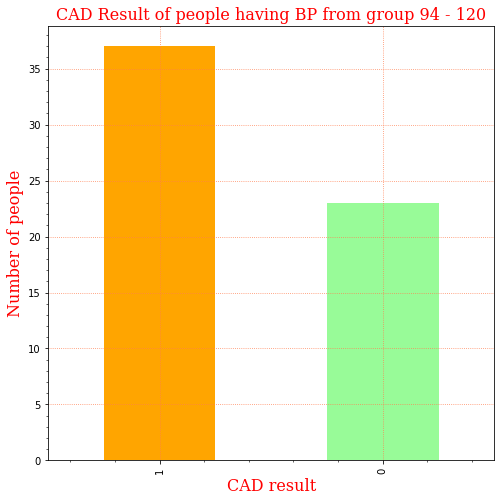

In [54]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_94_120.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_94_120['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 94 - 120',fontdict=label_style)

**BP Group2: (120-130]**


In [55]:
rest_bp_120_130 = pd.DataFrame(heart[(heart['rest_bp'] >= 120.0) & (heart['rest_bp'] < 130.0)]['result'].value_counts())
rest_bp_120_130.reset_index(inplace=True)
rest_bp_120_130.columns = ['CAD Result','Patient_Count']
rest_bp_120_130['color'] = rest_bp_120_130['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [56]:
rest_bp_120_130


,CAD Result,Patient_Count,color
0,1,40,orange
1,0,35,palegreen


Text(0.5, 1.0, 'CAD Result of people having BP from group 120 - 130')

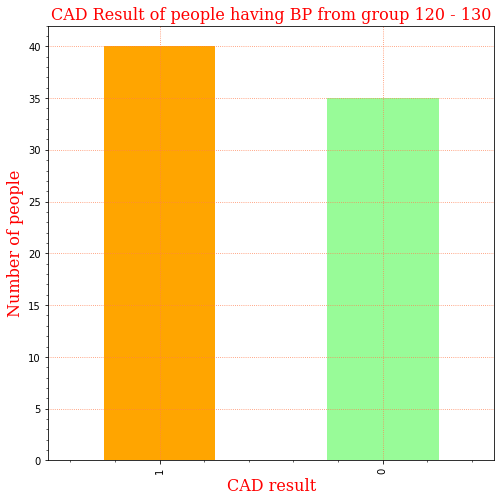

In [57]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_120_130.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_120_130['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 120 - 130',fontdict=label_style)

**BP Group3: (130-140]**


In [58]:
rest_bp_130_140 = pd.DataFrame(heart[(heart['rest_bp'] >= 130.0) & (heart['rest_bp'] < 140.0)]['result'].value_counts())
rest_bp_130_140.reset_index(inplace=True)
rest_bp_130_140.columns = ['CAD Result','Patient_Count']
rest_bp_130_140['color'] = rest_bp_130_140['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [59]:
rest_bp_130_140


,CAD Result,Patient_Count,color
0,1,44,orange
1,0,27,palegreen


Text(0.5, 1.0, 'CAD Result of people having BP from group 130 - 140')

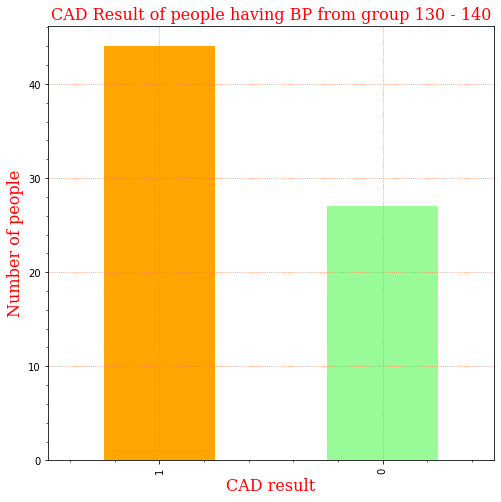

In [60]:
label_style={'family':'serif','color':'red','size':16}
rest_bp_130_140.plot(kind='bar',y='Patient_Count',x='CAD Result',figsize=(8,8),color=rest_bp_130_140['color'],legend=False)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('CAD result',fontdict=label_style)
plt.ylabel('Number of people',fontdict=label_style)
plt.title('CAD Result of people having BP from group 130 - 140',fontdict=label_style)

**BP Group4: 140 or more**


In [61]:
rest_bp_140_more = pd.DataFrame(heart[(heart['rest_bp'] >= 140.0)]['result'].value_counts())
rest_bp_140_more.reset_index(inplace=True)
rest_bp_140_more.columns = ['CAD Result','Patient_Count']
rest_bp_140_more['color'] = rest_bp_140_more['CAD Result'].apply(lambda val : 'palegreen' if val == 0 else 'orange')

In [62]:
rest_bp_140_more


,CAD Result,Patient_Count,color
0,0,53,palegreen
1,1,44,orange


***Question-7: Does high blood pressure corresponds to high serum cholestrol, also leads to CAD?***


In [63]:
heart['cholestrol'].describe()


count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: cholestrol, dtype: float64

Text(0.5, 1.0, 'CAD Result')

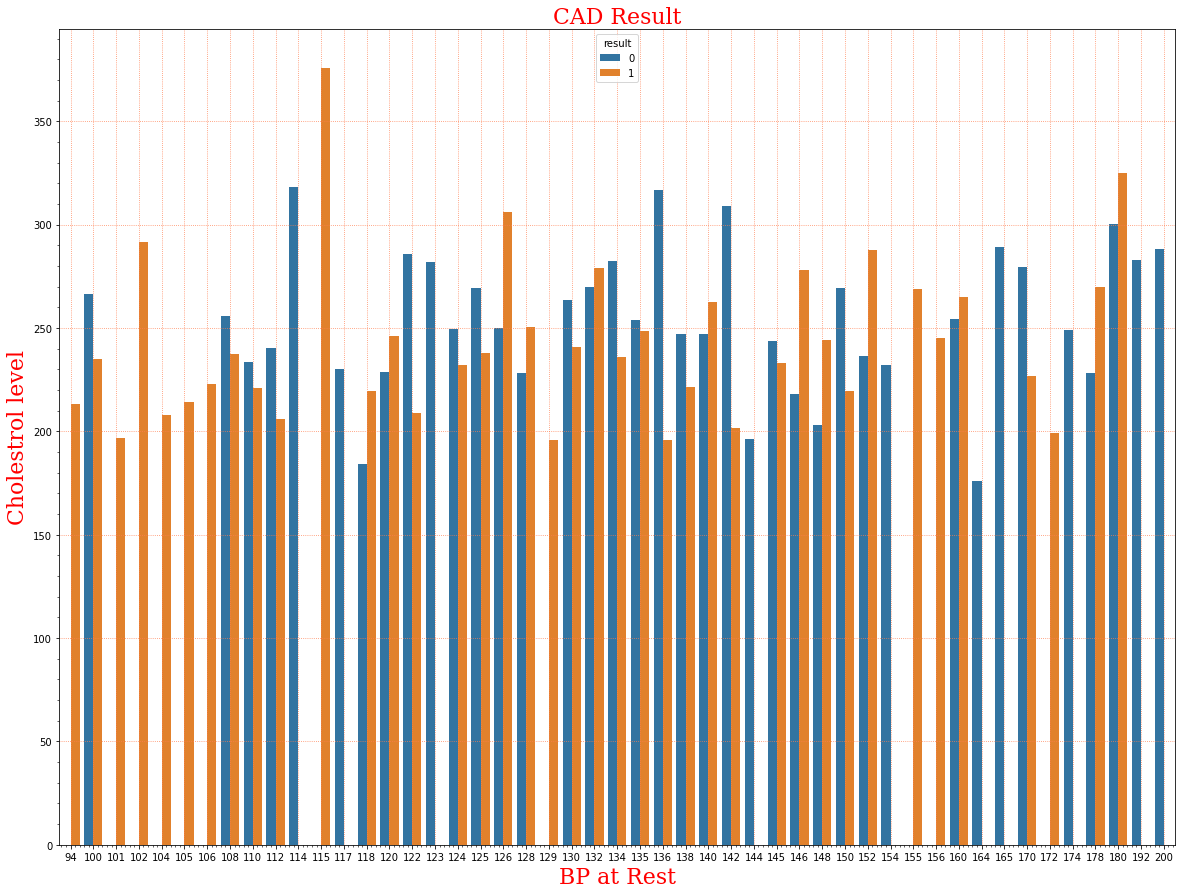

In [64]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(20,15))
sns.barplot(x=heart['rest_bp'],y=heart['cholestrol'],hue=heart['result'],ci=None,dodge=True)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('CAD Result',fontdict=label_style)

***Question-8: Does high blood pressure corresponds to high serum cholestrol, also leads to high blood sugar?***


Text(0.5, 1.0, 'Blood Sugar Result')

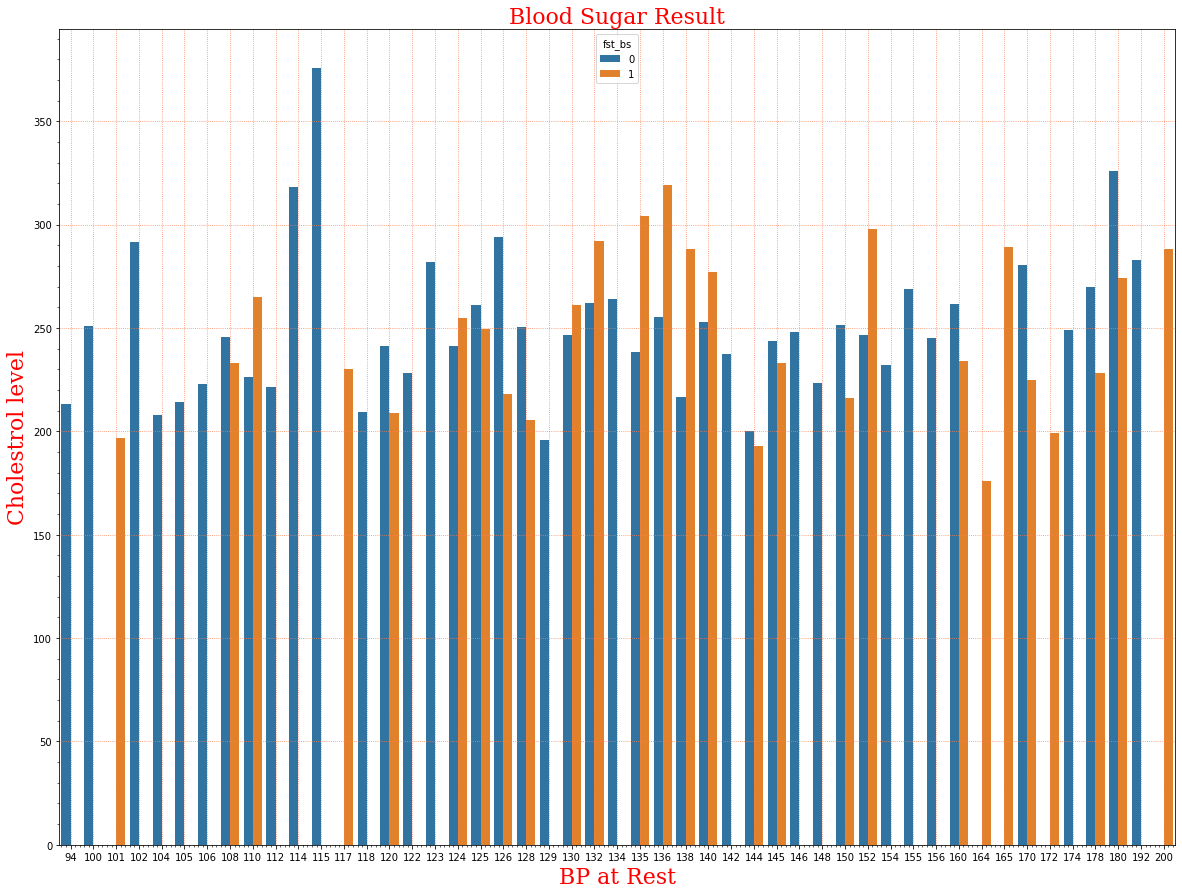

In [65]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(20,15))
sns.barplot(x=heart['rest_bp'],y=heart['cholestrol'],hue=heart['fst_bs'],ci=None,dodge=True)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('Blood Sugar Result',fontdict=label_style)

***Question-9: Does high blood pressure corresponds to high blood sugar, also leads to CAD?***


In [66]:
pd.DataFrame(heart[heart['rest_bp'] >=160]['fst_bs'].value_counts())

,fst_bs
0,18
1,8


In [67]:
sugar_high_bp_relation = pd.DataFrame(heart[heart['rest_bp'] >=160].groupby(['fst_bs','result'])['age'].count())
sugar_high_bp_relation.columns = ['People count']
sugar_high_bp_relation.index.names = ['Blood Sugar(0:Low,1:High)','CAD Result']
sugar_high_bp_relation

People count
Blood Sugar(0:Low,1:High) CAD Result              
0                         0                     11
                          1                      7
1                         0                      6
                          1                      2

***Question-10: Does ST Wave Abnormality corresponds leads to CAD?***


In [68]:
pd.DataFrame(heart.groupby('rest_ecg')['result'].count())

,result
rest_ecg,
0,147
1,152
2,4


In [69]:
rest_ecg_CAD_relation = pd.DataFrame(heart.groupby(['rest_ecg','result'])['age'].count())
rest_ecg_CAD_relation.columns = ['People Count']
rest_ecg_CAD_relation.index.names = ['Rest ECG(0:Normal, 1:ST Wave Abnormal, 2:Left Vent Hypertrophy)','CAD Result']
rest_ecg_CAD_relation

People Count
Rest ECG(0:Normal, 1:ST Wave Abnormal, 2:Left V... CAD Result              
0                                                  0                     79
                                                   1                     68
1                                                  0                     56
                                                   1                     96
2                                                  0                      3
                                                   1                      1

In [70]:
rest_ecg_CAD_relation.reset_index(inplace=True)


In [71]:
rest_ecg_CAD_relation.columns = ['Rest_ECG','CAD_Result','People_Count']

Text(0.5, 1.0, 'Rest ECG & CAD relation')

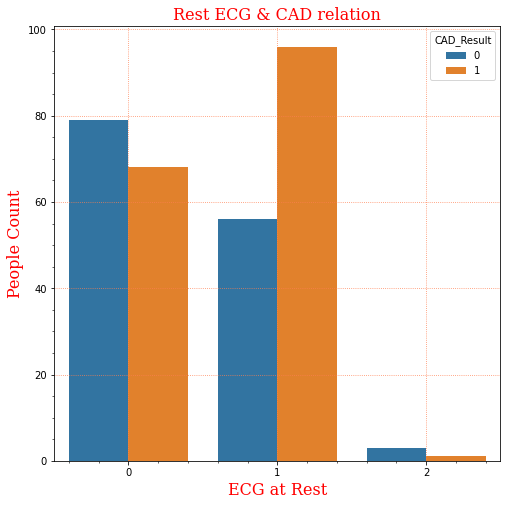

In [72]:
label_style={'family':'serif','color':'red','size':16}
plt.figure(figsize=(8,8))
sns.barplot(x=rest_ecg_CAD_relation['Rest_ECG'],y=rest_ecg_CAD_relation['People_Count'],hue=rest_ecg_CAD_relation['CAD_Result'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('ECG at Rest',fontdict=label_style)
plt.ylabel('People Count',fontdict=label_style)
plt.title('Rest ECG & CAD relation',fontdict=label_style)

***Question-11: Does LEFT VENTRICULAR HYPERTROPHY has a realtion with Blood Pressure and Cholestrol?***


In [73]:
heart[heart['rest_ecg'] == 2][['rest_bp','cholestrol']].describe()

,rest_bp,cholestrol
count,4.000000,4.000000
mean,140.500000,261.750000
std,28.396009,70.320101
min,114.000000,197.000000
25%,124.500000,203.000000
50%,134.000000,261.500000
75%,150.000000,320.250000
max,180.000000,327.000000


In [74]:
left_vent_ht_bp_chol_relation = heart[heart['rest_ecg'] == 2][['rest_bp','cholestrol','result']]

Text(0.5, 1.0, 'Rest BP & Cholestrol relation for Left Ventricular Hypertrophy')

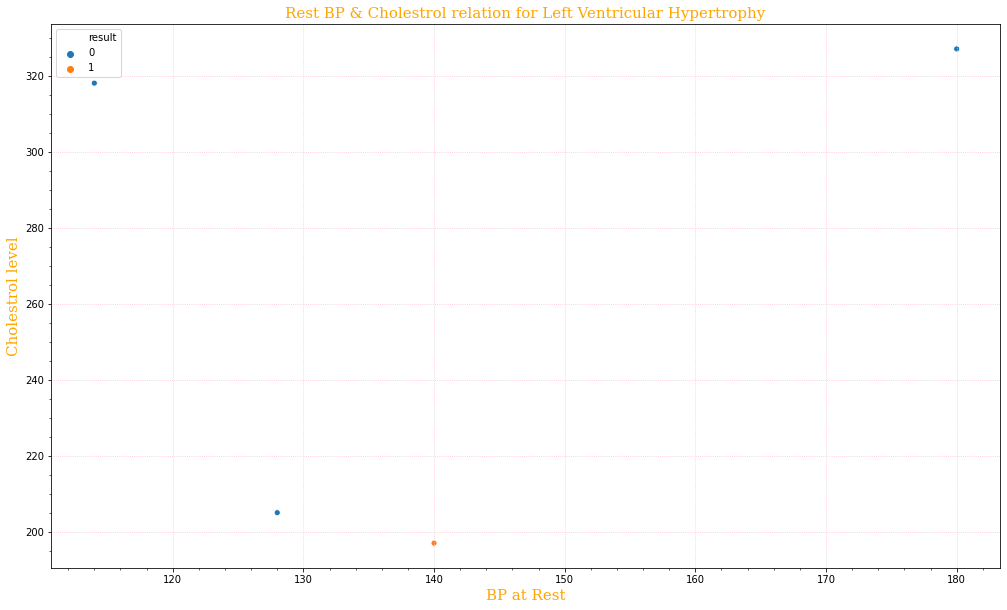

In [75]:
label_style={'family':'serif','color':'orange','size':15}
plt.figure(figsize=(17,10))
sns.scatterplot(x=left_vent_ht_bp_chol_relation['rest_bp'],y=left_vent_ht_bp_chol_relation['cholestrol'],hue=left_vent_ht_bp_chol_relation['result'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('BP at Rest',fontdict=label_style)
plt.ylabel('Cholestrol level',fontdict=label_style)
plt.title('Rest BP & Cholestrol relation for Left Ventricular Hypertrophy',fontdict=label_style)

***Question-12: Does LEFT VENTRICULAR HYPERTROPHY associated with High Blood Sugar, also leads to CAD?***


In [76]:
left_vent_hyt_bs_cad = heart[heart['rest_ecg'] == 2][['age','fst_bs','result']].groupby(by=['fst_bs','result']).count()
left_vent_hyt_bs_cad.index.names = ['Blood Sugar','CAD Result']
left_vent_hyt_bs_cad.columns = ['People count']

In [77]:
left_vent_hyt_bs_cad


People count
Blood Sugar CAD Result              
0           0                      3
            1                      1

***Question-13: Does MAX Heart Rate corresponds to BP at Rest, also leads to CAD?***


In [78]:
heart['max_hrt_rate'].describe()


count    303.000000
mean     149.646865
std       22.905161
min       71.000000
25%      133.500000
50%      153.000000
75%      166.000000
max      202.000000
Name: max_hrt_rate, dtype: float64

Text(0.5, 1.0, 'Rest BP & Max Heart Rate relation')

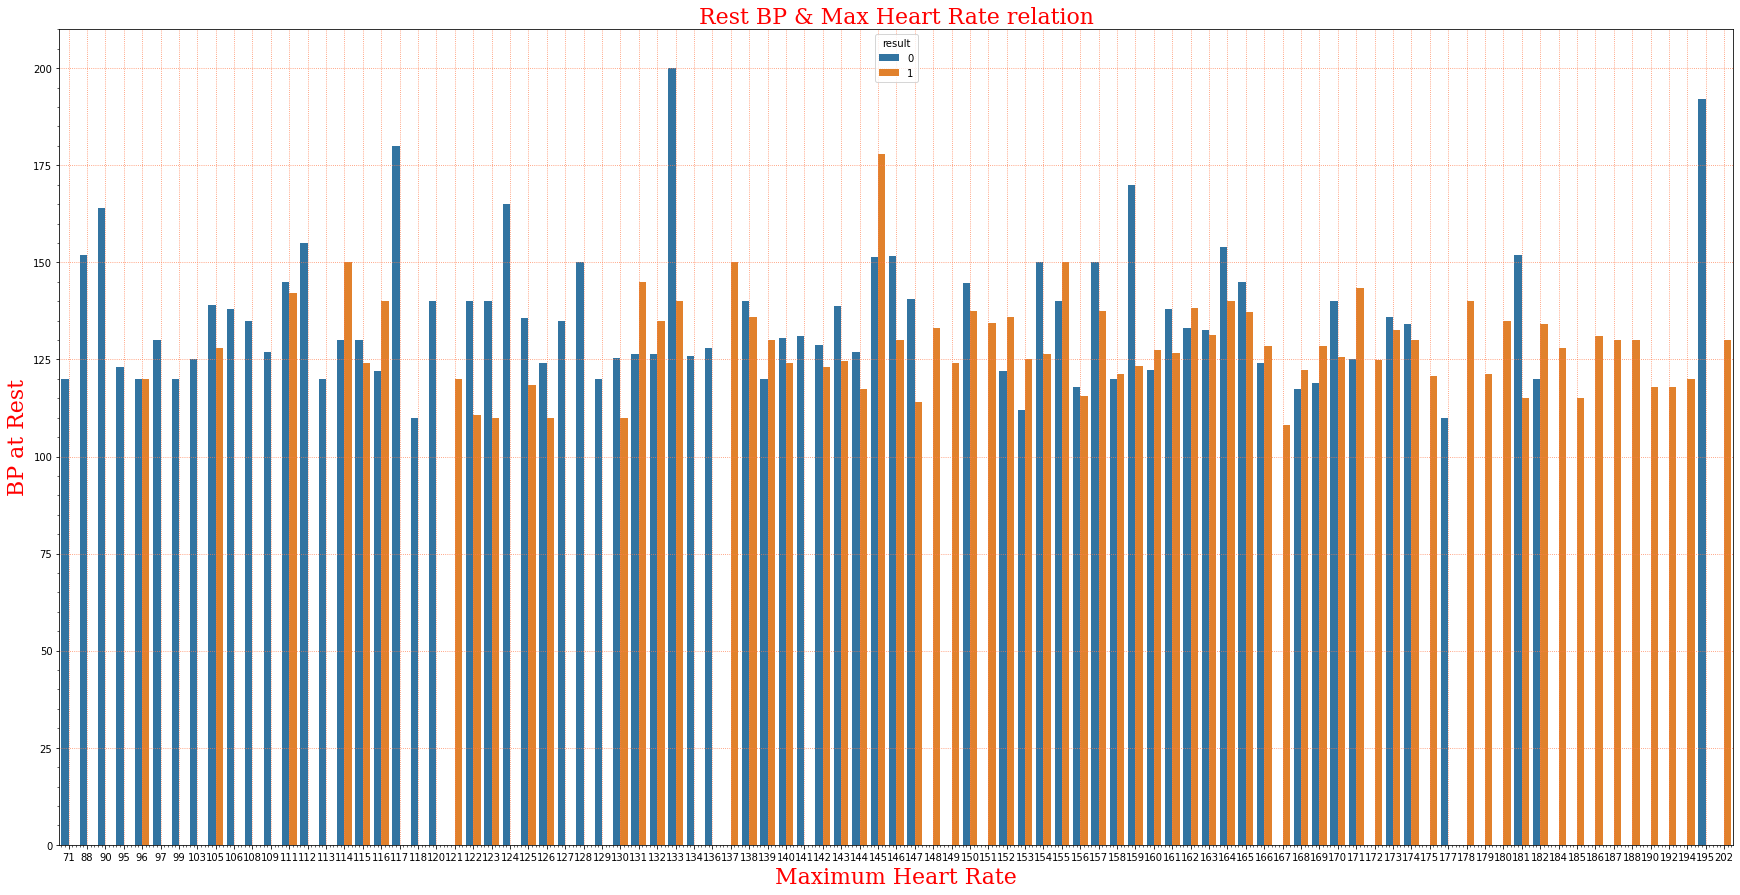

In [79]:
label_style={'family':'serif','color':'red','size':22}
plt.figure(figsize=(30,15))
sns.barplot(x=heart['max_hrt_rate'],y=heart['rest_bp'],hue=heart['result'],ci=None)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='coral')
plt.xlabel('Maximum Heart Rate',fontdict=label_style)
plt.ylabel('BP at Rest',fontdict=label_style)
plt.title('Rest BP & Max Heart Rate relation',fontdict=label_style)

***Question-14: Does Exercise induced angina corresponds to CAD?***


In [80]:
pd.DataFrame(heart['ex_angina'].value_counts())

,ex_angina
0,204
1,99


In [81]:
exc_angina_cad = pd.DataFrame(heart.groupby(by=['ex_angina','result'],axis=0)['age'].count())
exc_angina_cad.index.names = ['Exc Angina(1:Yes, 0:No)', 'CAD Result']
exc_angina_cad.columns = ['People Count']
exc_angina_cad

People Count
Exc Angina(1:Yes, 0:No) CAD Result              
0                       0                     62
                        1                    142
1                       0                     76
                        1                     23

***Question-15: How exercise induced angina and oldpeak corresponds to the CAD result?***


In [82]:
exangina_oldpk = heart[heart['ex_angina'] == 1][['rest_bp','oldpeak','result']]

Text(0.5, 1.0, 'Rest BP & Old peak where patient felt exercise induced angina')

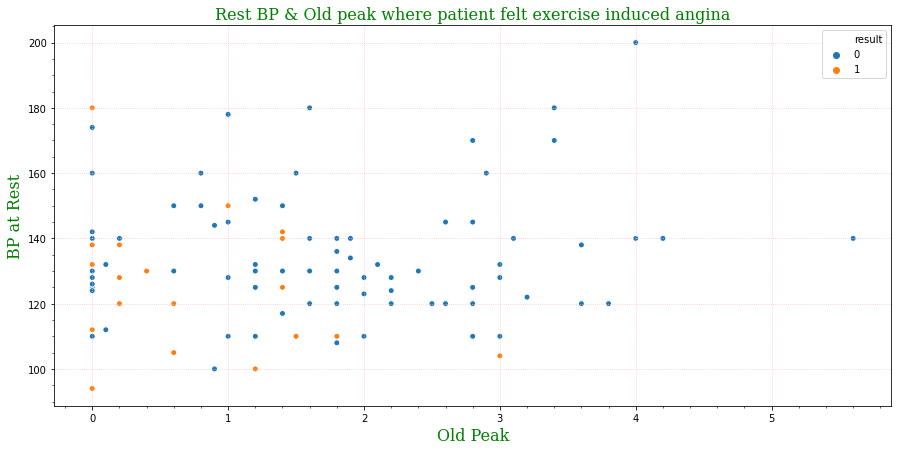

In [83]:
label_style={'family':'serif','color':'Green','size':16}
plt.figure(figsize=(15,7))
sns.scatterplot(x=exangina_oldpk['oldpeak'],y=exangina_oldpk['rest_bp'],hue=exangina_oldpk['result'],linewidth=1)
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Old Peak',fontdict=label_style)
plt.ylabel('BP at Rest',fontdict=label_style)
plt.title('Rest BP & Old peak where patient felt exercise induced angina',fontdict=label_style)

***Question-16: What kind of ST slope in exercise test corresponds more to CAD?***


In [84]:
pd.DataFrame(heart['slope'].value_counts())

,slope
2,142
1,140
0,21


In [85]:
pd.DataFrame(heart.groupby(['slope','result'])['age'].count())

age
slope result     
0     0        12
      1         9
1     0        91
      1        49
2     0        35
      1       107

***Question-17: Does ST slope has a relationship with Oldpeak and Max heart rate?***


In [86]:
heart[['rest_bp','oldpeak','slope']].head()


,rest_bp,oldpeak,slope
0,145,2.3,0
1,130,3.5,0
2,130,1.4,2
3,120,0.8,2
4,120,0.6,2


In [87]:
heart['slope'].unique()


array([0, 2, 1], dtype=int64)

Text(0.5, 1.0, 'Maximum heart rate & Old peak for different ST slopes')

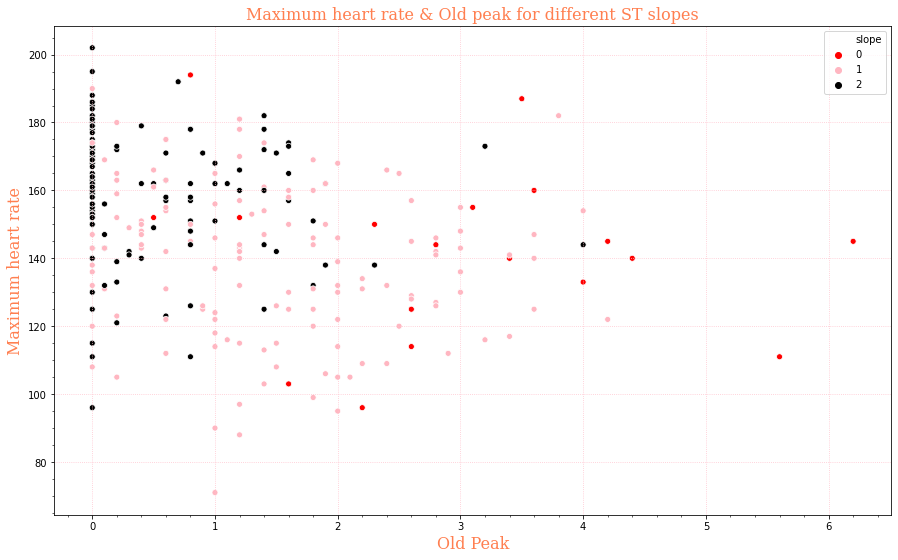

In [88]:
label_style={'family':'serif','color':'coral','size':16}
plt.figure(figsize=(15,9))
sns.scatterplot(x=heart['oldpeak'],y=heart['max_hrt_rate'],hue=heart['slope'],palette=['red','lightpink','black'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Old Peak',fontdict=label_style)
plt.ylabel('Maximum heart rate',fontdict=label_style)
plt.title('Maximum heart rate & Old peak for different ST slopes',fontdict=label_style)

***Question-18: How Color Vessels in Flouroscopy and Exercise induced angina corresponds to CAD?***


In [89]:
pd.DataFrame(heart['fix_color_vsl'].value_counts())


,fix_color_vsl
0,175
1,65
2,38
3,20
4,5


In [90]:
pd.DataFrame(heart.groupby(['fix_color_vsl','result'])['age'].count())

age
fix_color_vsl result     
0             0        45
              1       130
1             0        44
              1        21
2             0        31
              1         7
3             0        17
              1         3
4             0         1
              1         4

In [91]:
pd.DataFrame(heart.groupby(['fix_color_vsl','ex_angina','result'])['age'].count())

age
fix_color_vsl ex_angina result     
0             0         0        19
                        1       112
              1         0        26
                        1        18
1             0         0        19
                        1        16
              1         0        25
                        1         5
2             0         0        14
                        1         7
              1         0        17
3             0         0        10
                        1         3
              1         0         7
4             0         1         4
              1         0         1

***Question-19: How Thalassemia corrsponds to CAD?***


In [92]:
pd.DataFrame(heart['fix_thal'].value_counts())


,fix_thal
2,166
3,117
1,18
0,2


In [93]:
pd.DataFrame(heart.groupby(['fix_thal','result'])['age'].count())

age
fix_thal result     
0        0         1
         1         1
1        0        12
         1         6
2        0        36
         1       130
3        0        89
         1        28

***Question-20: Does Thalassemia has any relationship with Age or Max Heart rate/BP/Cholestrol?***


Text(0.5, 1.0, 'Maximum heart rate & Age for different effects of Thalassemia')

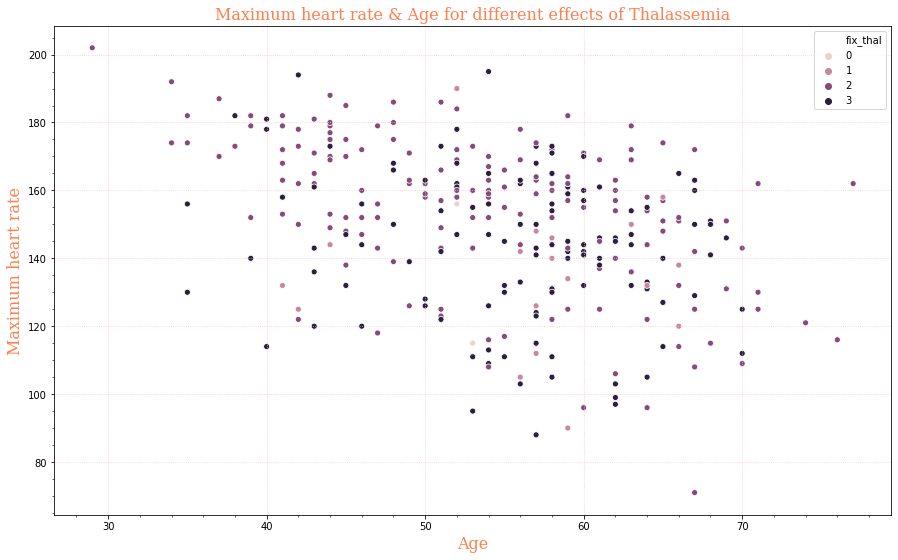

In [94]:
label_style={'family':'serif','color':'coral','size':16}
plt.figure(figsize=(15,9))
sns.scatterplot(x=heart['age'],y=heart['max_hrt_rate'],hue=heart['fix_thal'])
plt.minorticks_on()
plt.grid(which='major',linestyle=':',color='pink')
plt.xlabel('Age',fontdict=label_style)
plt.ylabel('Maximum heart rate',fontdict=label_style)
plt.title('Maximum heart rate & Age for different effects of Thalassemia',fontdict=label_style)

In [95]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import os
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import jaccard_score
from sklearn import metrics
from sklearn import preprocessing
import itertools
from sklearn.model_selection import validation_curve
from xgboost import XGBClassifier
import xgboost as xgb
from xgboost import plot_importance
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence, plot_partial_dependence
from sklearn.ensemble import GradientBoostingClassifier
import eli5
from eli5.sklearn import PermutationImportance
import shap
from mpl_toolkits.mplot3d import Axes3D

C:\Users\TANAYA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
C:\Users\TANAYA\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


**After Exploratory analysis let's see whether are there any outliers present.So we check the continuous data by boxplot.**

In [96]:
heart_1 = heart[["age", "rest_bp", "cholestrol", "fix_thal", "oldpeak"]]
heart_1.describe()

,age,rest_bp,cholestrol,fix_thal,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,2.313531,1.039604
std,9.082101,17.538143,51.830751,0.612277,1.161075
min,29.000000,94.000000,126.000000,0.000000,0.000000
25%,47.500000,120.000000,211.000000,2.000000,0.000000
50%,55.000000,130.000000,240.000000,2.000000,0.800000
75%,61.000000,140.000000,274.500000,3.000000,1.600000
max,77.000000,200.000000,564.000000,3.000000,6.200000


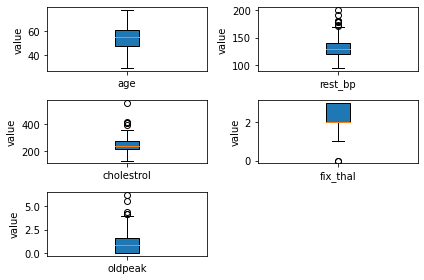

In [97]:
for item in heart_1.columns:
    plt.subplot(3,2,list(heart_1.columns).index(item)+1)
    plt.boxplot(heart_1[item], patch_artist=True, labels = [item])
    plt.ylabel("value")
plt.tight_layout()
plt.show()

**There are outliers in each features. Then remove the outliers.**

In [98]:
infor = heart.describe()

df2 = heart[heart.rest_bp < infor.loc["mean", "rest_bp"] + 3 * infor.loc["std", "rest_bp"]]
df3 = df2[heart.cholestrol < infor.loc["mean", "cholestrol"] + 3 * infor.loc["std", "cholestrol"]]
df4 = df3[heart.fix_thal > infor.loc["mean", "fix_thal"] - 3 * infor.loc["std", "fix_thal"]]
df_new = df4[heart.oldpeak < infor.loc["mean", "oldpeak"] + 3 * infor.loc["std", "oldpeak"]]
df_new.head()

Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.
Boolean Series key will be reindexed to match DataFrame index.


,age,gender,chest_pain,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,ex_angina,oldpeak,slope,result,fix_color_vsl,fix_thal
0,63,1,3,145,233,1,0,150,0,2.3,0,1,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,1,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,1,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,1,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,1,0,2


**Dealing with categorical data.**


Replace the name of category data and seperate them into different columns.



In [99]:
df_new.chest_pain = df_new.chest_pain.map({0:"asymptomatic", 1: "typical angina", 2:"atypical angina", 3:"non-anginal pain"})
df_new.gender = df_new.gender.map({0:"Female", 1:"Male"}) 
df_new.ex_angina = df_new.ex_angina.map({0:"exercise did not induce angina", 1:"exercise induced angina"})
df_new.slope = df_new.slope.map({1:"upsloping", 2:"flat", 3:"downsloping"})
df_new.fix_thal = df_new.fix_thal.map({1:"normal",2:"fixed defect", 3:"reversable defect"})
df_new = pd.get_dummies(df_new, drop_first = True)
df_new.head(10)


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,age,rest_bp,cholestrol,fst_bs,rest_ecg,max_hrt_rate,oldpeak,result,fix_color_vsl,gender_Male,chest_pain_atypical angina,chest_pain_non-anginal pain,chest_pain_typical angina,ex_angina_exercise induced angina,slope_upsloping,fix_thal_normal,fix_thal_reversable defect
0,63,145,233,1,0,150,2.3,1,0,1,0,1,0,0,0,1,0
1,37,130,250,0,1,187,3.5,1,0,1,1,0,0,0,0,0,0
2,41,130,204,0,0,172,1.4,1,0,0,0,0,1,0,0,0,0
3,56,120,236,0,1,178,0.8,1,0,1,0,0,1,0,0,0,0
4,57,120,354,0,1,163,0.6,1,0,0,0,0,0,1,0,0,0
5,57,140,192,0,1,148,0.4,1,0,1,0,0,0,0,1,1,0
6,56,140,294,0,0,153,1.3,1,0,0,0,0,1,0,1,0,0
7,44,120,263,0,1,173,0.0,1,0,1,0,0,1,0,0,0,1
8,52,172,199,1,1,162,0.5,1,0,1,1,0,0,0,0,0,1
9,57,150,168,0,1,174,1.6,1,0,1,1,0,0,0,0,0,0


**Splitting dataset into training & testing**

In [100]:
X = df_new.drop("result", 1).values
y = df_new["result"].astype("int").values
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.25, random_state=10)

In [101]:
model = XGBClassifier()
param = dict(model_max_depth=[3,5,7], model_learning_rate=[0.001,0.01, 0.1], model_n_estimators=[100,500])

cv = GridSearchCV(model, param_grid=param, cv=10, iid = True)
cv

GridSearchCV(cv=10,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None

**Get the best parameters for Hyperparameter Tuning using : GridsearchCV & best_estimator**

In [102]:
cv.fit(X_train, y_train)
test_pred = cv.predict(X_test)
cv.best_estimator_

The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.


XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints=None,
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, model_learning_rate=0.001,
              model_max_depth=3, model_n_estimators=100,
              monotone_constraints=None, n_estimators=100, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, subsample=1, tree_method=None,
              validate_parameters=False, verbosity=None)

Great! We got the learning rate equals to 0.1, max depth equals to 6 and number of trees equals to 100. Use the best condition to implement the XGBoost model.

In [103]:
max_depth_of_model = cv.best_estimator_.max_depth
best_learning_rate = cv.best_estimator_.learning_rate
best_estimator = cv.best_estimator_.n_estimators
best_reg_lambda = cv.best_estimator_.reg_lambda

model = XGBClassifier(max_depth=max_depth_of_model, learning_rate=best_learning_rate, n_estimators= best_estimator,n_jobs=1,)
model.fit(X_train, y_train)
yhat = model.predict(X_test)
y_proba = model.predict_proba(X_test)[:, 1]
accuracy_score(yhat,y_test)

0.7297297297297297

**The accuracy of model for 25% test data is 79.24%, but it eventually improved when test 80% data was trained with random_state 42 to 86%. After that, let's see the importance of each features.**

In [104]:
importances = model.feature_importances_
importances

array([0.02699867, 0.02948648, 0.03473125, 0.0122713 , 0.01998887,
       0.0532423 , 0.05930712, 0.10145088, 0.04812863, 0.07995382,
       0.02257985, 0.08803806, 0.14724633, 0.10389959, 0.        ,
       0.17267676], dtype=float32)

Sort the features on the basic of importances.



In [105]:
inducies = np.argsort(importances)[::-1]
inducies

array([15, 12, 13,  7, 11,  9,  6,  5,  8,  2,  1,  0, 10,  4,  3, 14],
      dtype=int64)

Arrange the features as dictionary data structure.



In [106]:
feature_dict = dict()
for idx in inducies:
    feature_dict[list(df_new.drop("result",1).columns)[idx]] = float(importances[idx])
feature_dict

{'fix_thal_reversable defect': 0.17267675697803497,
 'ex_angina_exercise induced angina': 0.1472463309764862,
 'slope_upsloping': 0.10389959067106247,
 'fix_color_vsl': 0.10145087540149689,
 'chest_pain_typical angina': 0.08803805708885193,
 'chest_pain_atypical angina': 0.07995381951332092,
 'oldpeak': 0.05930711701512337,
 'max_hrt_rate': 0.05324229598045349,
 'gender_Male': 0.048128630965948105,
 'cholestrol': 0.03473125398159027,
 'rest_bp': 0.029486481100320816,
 'age': 0.026998674497008324,
 'chest_pain_non-anginal pain': 0.022579848766326904,
 'rest_ecg': 0.019988873973488808,
 'fst_bs': 0.012271297164261341,
 'fix_thal_normal': 0.0}

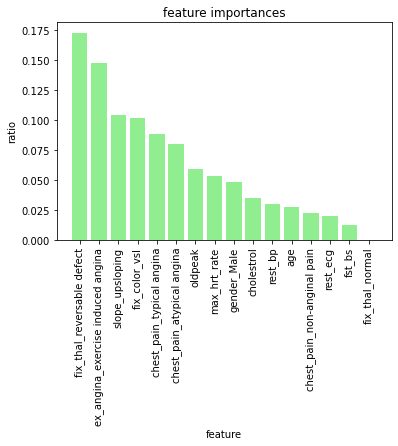

In [107]:
y_pos = np.arange(len(feature_dict.keys()))
plt.bar(y_pos, list(feature_dict.values()), align = "center",color = "lightgreen")
plt.xticks(y_pos, list(feature_dict.keys()), rotation = 90)
plt.xlabel("feature")
plt.ylabel("ratio")
plt.title("feature importances")
plt.show()

**'fix_thal_normal' is not an important feature,on the other hand reversible and exercise induces angina show much higher importance**

As we mentioned in introduction, we hope the recall accuracy is high. Before getting the score, we calculate four parts of confusion matrix.



In [108]:
tp,fn,fp,tn = confusion_matrix(y_test, yhat, labels=[1,0]).ravel()
tp,tn,fp,fn

(28, 26, 15, 5)

First one is true positive. It means that the sample is positive example, and the prediction is also positive. Second one is false negative. This means that the sample is positive example, but the prediction is negative, and this is what we care about. Third one is false positive. This one is relatived to precision of model. Most time we care about precision more, but this time the recall rate is more important. Last but not least, true negative is that the predicition and sample are all negative. It's a bit the same as true positive.

In [109]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    return ""

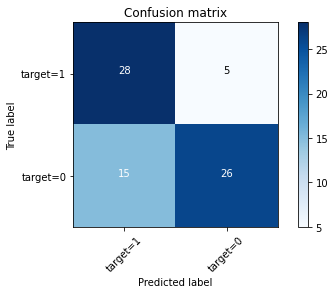

In [110]:
cmx = confusion_matrix(y_test, yhat, labels=[1,0])
print(plot_confusion_matrix(cmx, classes=['target=1','target=0'],normalize= False,  title='Confusion matrix'))

In [111]:
precision_rate = tp / (tp + fp)
recall_rate = tp / (tp + fn)
print("The precision rate is: ", precision_rate)
print("The recall rate is: ", recall_rate)

The precision rate is:  0.6511627906976745
The recall rate is:  0.8484848484848485


**The recall rate is about 97%, that is, still 3% of patient who has heart disease will be misdiagnosed. But now it's good enough.**

**In this type of dataset, the recall rate is much important than precision rate, because no one want to misdiagnose the patient who has heart disease.**

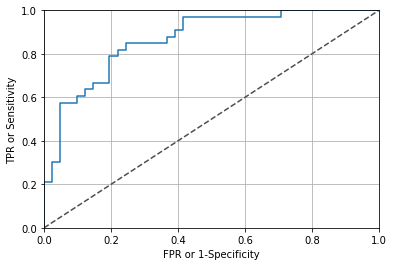

In [112]:
fpr, tpr, threshold =roc_curve(y_test, y_proba)
fig, ax = plt.subplots()
ax.plot(fpr,tpr)
ax.plot([0,1], [0,1], transform = ax.transAxes, ls="--", c="0.3")
plt.xlim(0.0, 1.0)
plt.ylim(0.0, 1.0)
plt.xlabel("FPR or 1-Specificity")
plt.ylabel("TPR or Sensitivity")
plt.rcParams["font.size"] = 10
plt.grid(True)
plt.show()

Next, we figure out the ROC curve performance. The two main parameters of ROC curve is TPR and FPR. TPR is called true positive rate, and also called hit rate or sensitivity. The meaning of TPR is the ratio of positive sample being determined correctly. On the other hand, FPR is the ratio of negative sample being determined incorrectly. That is, the formula is defined (1 - Specificity).

In [113]:
auc(fpr, tpr)


0.8662232076866223

If the AUC is in the range of 0.5~1, that means the model has value of prediction. The higher the score is, the better the model is. Moreover, the model will be a perfect classifier if the AUC equals to one. We got the ~0.9 of the AUC score, which is not bad!

In [114]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = df_new.drop("result", 1).columns.tolist())

Weight,Feature
0.0324 ± 0.0132,gender_Male
0.0243 ± 0.0202,fix_color_vsl
0.0054 ± 0.0132,rest_ecg
0 ± 0.0000,fix_thal_normal
0 ± 0.0000,chest_pain_typical angina
0 ± 0.0000,chest_pain_non-anginal pain
-0.0027 ± 0.0108,slope_upsloping
-0.0054 ± 0.0439,fix_thal_reversable defect
-0.0081 ± 0.0132,oldpeak
-0.0081 ± 0.0132,age


**Next, we see how fix_color_vsl(number of major vessels colored by flourosopy) affects the heart disease.**

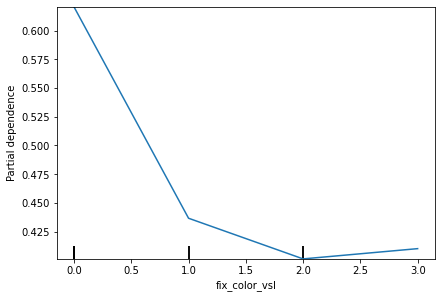

In [115]:
my_plots = plot_partial_dependence(model, features = [7], X = X_test, 
                                   feature_names = df_new.drop("result", 1).columns[:8], grid_resolution=5)            

plt.subplots_adjust(top=1.0, right=1.0)
my_plots

According to the medicine knowledge, if the major vessels colored by flourosopy get more, it means that the risk of heart disease will be lower. So, vessel flourosopy examination for everyone is a very important process to diagnose whether the people has heart disease or not.

How abot the max heart rate??



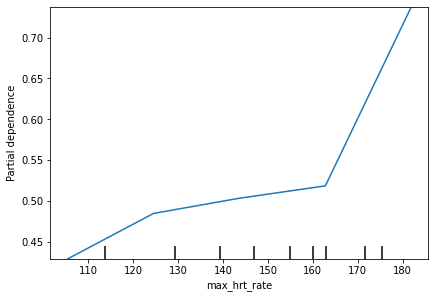

In [116]:
my_plots = plot_partial_dependence(model, features = [5], X = X_test, 
                                   feature_names = df_new.drop("result", 1).columns[:6], grid_resolution=5)     

plt.subplots_adjust(top=1.0, right=1.0)
my_plots

But, see the partial dependence results, the faster the rate is, the higher the risk is. Does it mean that the young persons are in the high risk of heart disease? Not really! If the max heart rate become faster year by year, it is possible that the heart become weaker.


We all think intuitively that high blood pressure causes heart disease, is it real!?



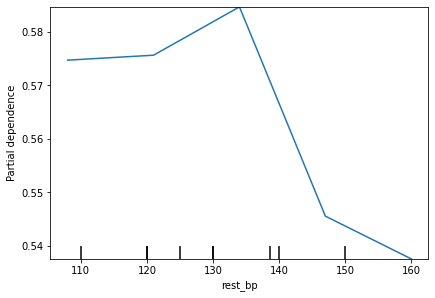

In [117]:
my_plots = plot_partial_dependence(model, features = [1], X = X_test, 
                                   feature_names = df_new.drop("result", 1).columns[:2], grid_resolution=5)     

plt.subplots_adjust(top=1.0, right=1.0)
my_plots

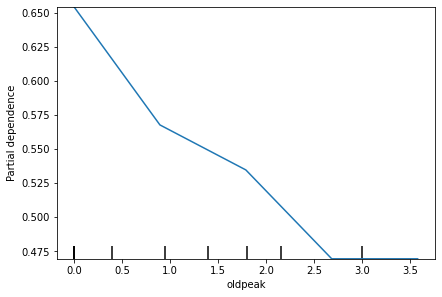

In [118]:
my_plots = plot_partial_dependence(model, features = [6], X = X_test, 
                                   feature_names = df_new.drop("result", 1).columns[:7], grid_resolution=5)     

plt.subplots_adjust(top=1.0, right=1.0)
my_plots

When the st segment depresses too much, that's means that the heart is lack of oxygen. On the other hand, a person with asymptomatic ST-depression during exercise has high risk of sudden cardiac death. This result is impressive.

Maximum heart rate plays an important role in getting heart disease, the result surprised me because it is positive related to the heart disease. 

In [119]:
feature_dict = dict(enumerate(df_new.drop("result", 1).columns))
feature_dict

{0: 'age',
 1: 'rest_bp',
 2: 'cholestrol',
 3: 'fst_bs',
 4: 'rest_ecg',
 5: 'max_hrt_rate',
 6: 'oldpeak',
 7: 'fix_color_vsl',
 8: 'gender_Male',
 9: 'chest_pain_atypical angina',
 10: 'chest_pain_non-anginal pain',
 11: 'chest_pain_typical angina',
 12: 'ex_angina_exercise induced angina',
 13: 'slope_upsloping',
 14: 'fix_thal_normal',
 15: 'fix_thal_reversable defect'}

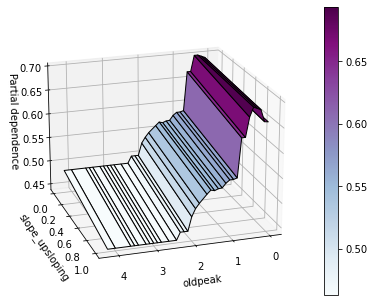

In [120]:
fig = plt.figure()
target_feature = (6, 13)
pdp, axes = partial_dependence(model, X_train, target_feature,  grid_resolution=50)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].reshape(list(map(np.size, axes))).T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1, cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(feature_dict[target_feature[0]])
ax.set_ylabel(feature_dict[target_feature[1]])
ax.set_zlabel('Partial dependence')

ax.view_init(elev=20, azim=72)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)
plt.show()

**From this chart, a person with asymptomatic st-depression and flat slope is under high risk of getting heart disease.**

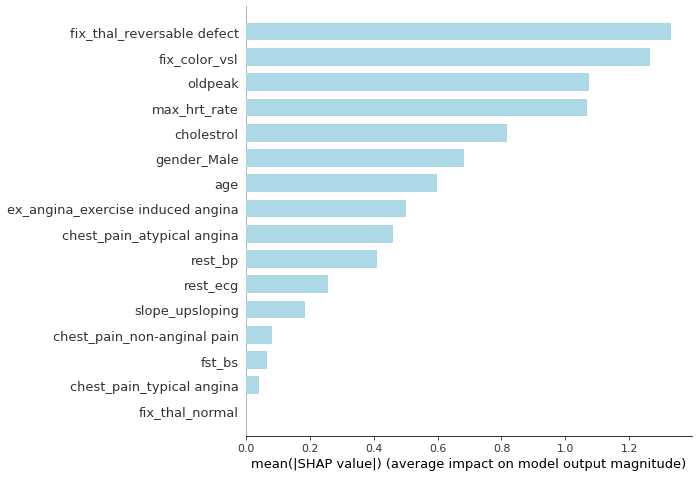

In [121]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()), plot_type = "bar", color = "lightblue")

**Finally, let's plot the shap summary to know the data distribution of each features.**



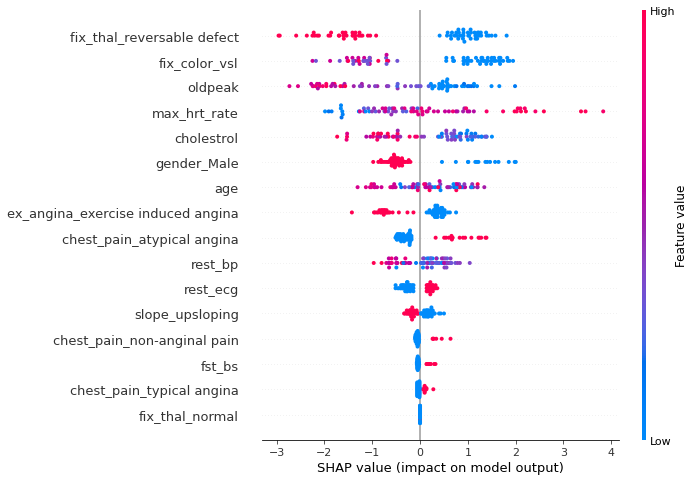

In [122]:
shap.summary_plot(shap_values, X_test, feature_names = list(feature_dict.values()))

Obviously, we find some features are seperated completely, like fix_color_vsl(number of major vessels colored by flourosopy), reversable defect, atypical angina, slope_upsloping, restecg, gender_Male etc. It's easy to see the trend of each features. Most of these features are expected but gender_Male and exercise induced angina. From our basic knowledge, if someone has angina while exerciseing, this person may be at risk. But the shap plot shows us the opposite results, that's interesting.

Also, we plot the shap force plot of lots of persons at once. We can easily to understandard what causes each person toward heart disease. As shown below, we choose all the male to see the distribution.

In [123]:
def shap_force_plot_of_data(model, dataset):
    explainer = shap.TreeExplainer(model)
    shap_value_for_sample = explainer.shap_values(dataset)
    shap.initjs()
    drivein_force = shap.force_plot(explainer.expected_value, shap_value_for_sample, dataset)
    return drivein_force

person_is_monitored = pd.DataFrame(X_test, columns = list(feature_dict.values()))
shap_force_plot_of_data(model, person_is_monitored[person_is_monitored["gender_Male"]==1])

Conclusion
Cardiovascular diseases is the top one killer for many years. I think that the reasons are our lack of knowledge about heart disease and the life habits. According to the model and features analysis, we know which features that we can do regular self-examinations.

I think the most obvious symptom is chest pain. There are three types of chest pain, but only atypical angina is strongly related to the heart disease. No matter which type of chest pain you have, go to the doctor in case.

In addition, everyone should always keep an eye on the resting blood pressure. The ideal resting blood pressure is lower than 120mmHg, but if your blood pressure is much lower than the 120mmHg, it means that you are under high risk of heart disease. Besides, the problem will not be only heart when the blood pressure is higher than 150mmHg.

Lots and lots of electronic devices that can measure heart rate, so it's easier to monitor your own. Record max heart rate to make sure that your heart is still healthy. Once the rate rises year by year, there must be something wrong with you.